In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

In [5]:
rand_seed = 42

In [6]:
roll_number = 2021101034
L = ((roll_number %5)+1)*100
print(L)

500


In [7]:
p_values = [0.3, 0.4, 0.7]

# Part 1

In [8]:
def compute_cluster_sizes(lattice):
  labels, _ = label(lattice)

  label_list = labels.ravel()
  cluster_sizes = np.bincount(label_list)
  cluster_sizes = cluster_sizes[1:] # removing 0 labels (i.e background)

  return cluster_sizes

def plot_distribution(p, for_critical=False):
  np.random.seed(rand_seed)
  lattice = np.random.rand(L, L) < p

  cluster_sizes = compute_cluster_sizes(lattice)

  logbins = np.logspace(0, np.log10(max(cluster_sizes)), num=10)
  widths = (logbins[1:] - logbins[:-1])
  counts, edges = np.histogram(cluster_sizes, bins=logbins)
  centers = (edges[:-1] + edges[1:]) / 2
  # plt.bar(centers, counts, width=widths)

  unique_sizes, freq = np.unique(cluster_sizes, return_counts=True)

  plt.loglog(centers, counts, label=f'With Binning', color='red')
  plt.loglog(unique_sizes, freq, label=f'Without Binning', color='blue')
  
  plt.title(f'Cluster Size Distribution for p={p} (log-log scale)')
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

  plt.plot(unique_sizes, freq, label=f'p={p}')
  plt.title(f'Cluster Size Distribution for p={p} (linear scale)')
  plt.xlabel('Cluster Size')
  plt.ylabel('Frequency')
  plt.show()

  if(for_critical):
    x = np.log10(unique_sizes)
    y = np.log10(freq)

    slope = np.polyfit(x, y, 1)[0]

    print('For p = p_critical, exponent is: ', slope)

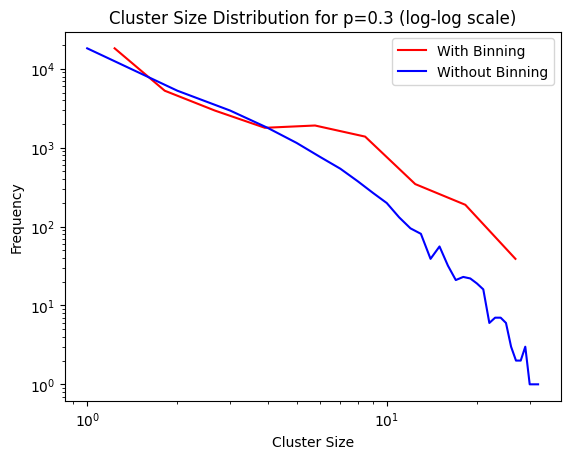

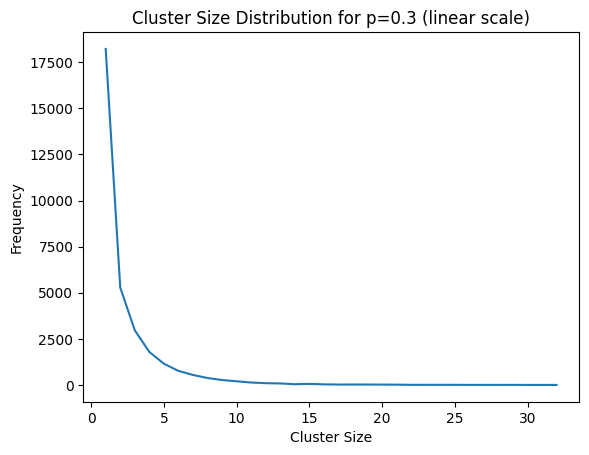

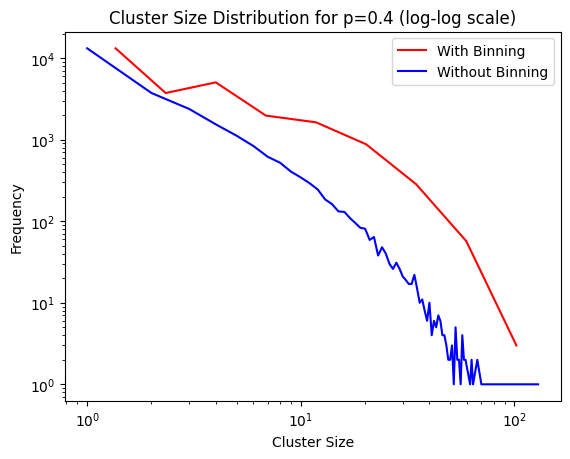

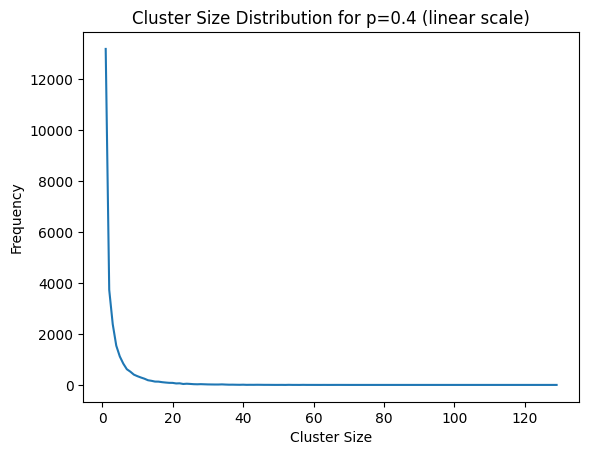

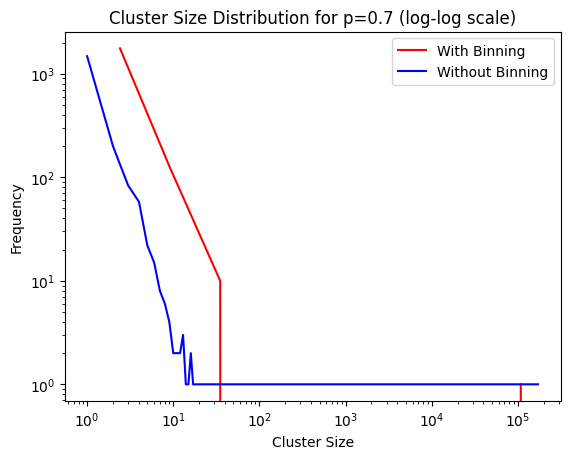

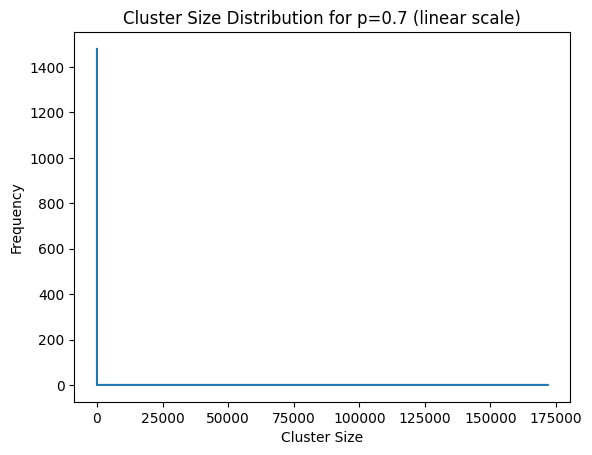

In [9]:
for p in p_values:
  plot_distribution(p)

# For p_critical

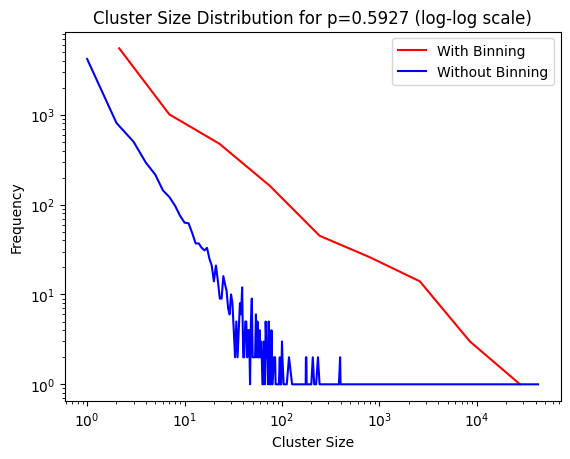

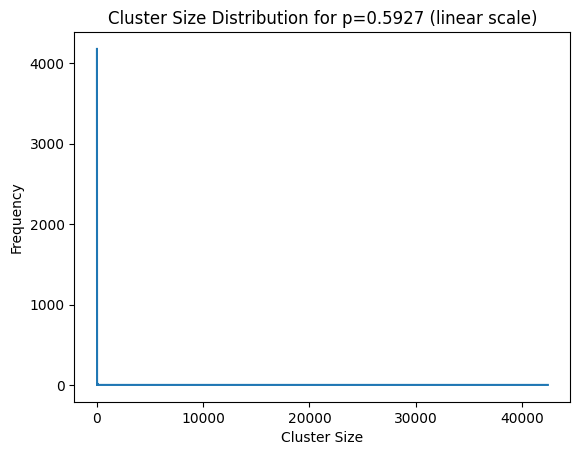

For p = p_critical, exponent is:  -0.704404732764844


In [10]:
plot_distribution(0.5927, for_critical=True)

# From above, for p = p_critical, exponent is -0.704404732764844

# Part 2

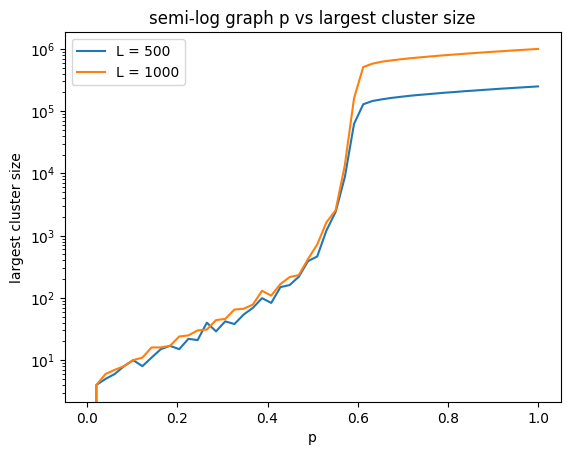

In [7]:
L_values = [L, 2*L]

def find_largest_clusters(L_value, p):
  lattice = np.random.rand(L_value, L_value) < p
  cluster_sizes = compute_cluster_sizes(lattice)
  if(len(cluster_sizes) == 0):
    return 0
  else:
    largest_cluster_size = np.max(cluster_sizes)
    return largest_cluster_size

for L_value in L_values:
  p_linspace = np.linspace(0, 1, 50)
  largest_clusters = [find_largest_clusters(L_value, p) for p in p_linspace]

  plt.semilogy(p_linspace, largest_clusters, label=f"L = {L_value}")

plt.title("semi-log graph p vs largest cluster size")
plt.legend()
plt.xlabel("p")
plt.ylabel("largest cluster size")
plt.show()

# Part 3

## Dataset obtained from wikipedia

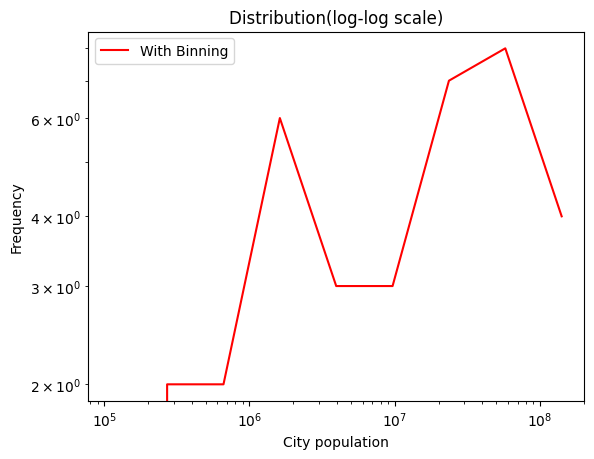

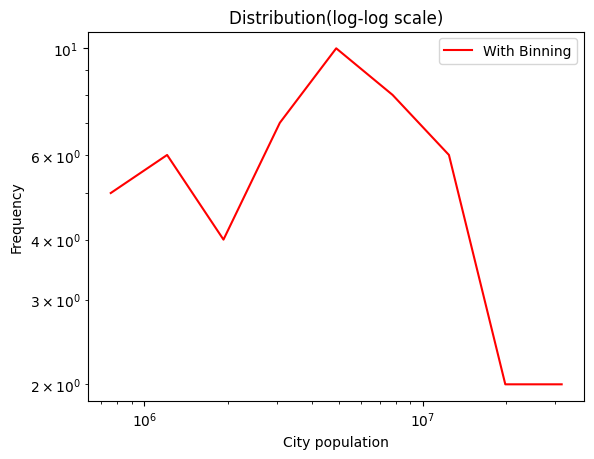

In [8]:
import pandas as pd
import powerlaw

data_india = pd.read_csv("india.csv", header=None).to_numpy().ravel()
data_us = pd.read_csv("us.csv", header=None).to_numpy().ravel()

def temp(data):

  logbins = np.logspace(np.log10(min(data)), np.log10(max(data)), num=10)
  widths = (logbins[1:] - logbins[:-1])
  counts, edges = np.histogram(data, bins=logbins)
  centers = (edges[:-1] + edges[1:]) / 2

  plt.loglog(centers, counts, label=f'With Binning', color='red')
  
  plt.title(f'Distribution(log-log scale)')
  plt.xlabel('City population')
  plt.ylabel('Frequency')
  plt.legend()
  plt.show()

temp(data_india)
temp(data_us)

## Since the distribution in log-log scale is not linear, it does not obey power law